## Albina Jetybayeva. DSE511. Project 1.


# Task 2. Analyze Delta variant situation in India and the USA

From the previous task, it was observed how very contagious strains like Delta can affect even highly vaccinated countries like Israel. It was interesting to see the direct effect of Delta on covid cases number before and after detecting the first Delta case in countries like the USA and India. To compare the countries in a more fair way incident rate was chosen for the analysis.

In [52]:
#First load the necessary packages:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
#Extract data from the file to see the overall confirmed cases trends for both countries:
data_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [54]:
#Remove unneccessary information such as Longtidue and Lattitude
data_confirmed.drop(['Lat','Long', 'Province/State'],axis=1, inplace=True)
data_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
1,Albania,0,0,0,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
2,Algeria,0,0,0,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
3,Andorra,0,0,0,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
4,Angola,0,0,0,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [55]:
#Extract information for US and India

data_confirmed.set_index("Country/Region", inplace = True)
result_india = data_confirmed.loc["India"]
print(result_india)
result_us = data_confirmed.loc["US"]
print(result_us)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
9/3/21     32945907
9/4/21     32988673
9/5/21     33027621
9/6/21     33058843
9/7/21     33096718
Name: India, Length: 595, dtype: int64
1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
9/3/21     39850260
9/4/21     39906431
9/5/21     39944992
9/6/21     40018318
9/7/21     40280001
Name: US, Length: 595, dtype: int64


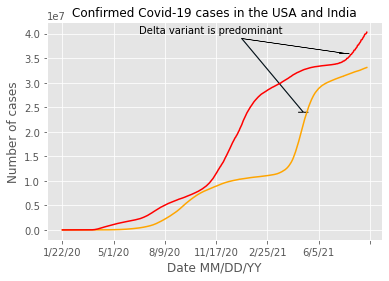

In [56]:
#Plot the confirmed cases for India and US and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result_india.plot(kind='line', color='orange')
result_us.plot(kind='line', color='red')


plt.title('Confirmed Covid-19 cases in the USA and India', fontsize=12)
plt.xlabel('Date MM/DD/YY')
plt.ylabel('Number of cases')

#Annotate the trend change on the graph from the first observation

plt.text(150, 40000000, 'Delta variant is predominant')
plt.arrow(350, 39000000, 120, -15000000, width = 1.5, ec='black', head_width = 20)
plt.arrow(350, 39000000, 200, -3000000, width = 1.5, ec='black', head_width = 20)


plt.show()

## Assumptions:

* Taking the period of heavy surge and predominance of Delta variant as the beginning of May for India (based on reference).
* Taking the period of heavy surge and predominance of Delta variant as the end of August for the USA (based on reference).

* So the periods of comparison for India were 2 months before Delta surge (03/01/2021-03/07/2021) and after (05/01/2021-05/07/2021).
* So the periods of comparison for the USA were 2 months before Delta surge (06/21/2021-06/27/2021) and after (09/21/2021-06/27/2021).


## Part 1. India case

In [57]:
#India incident rate on each specific day before delta surge March 1-7. March 1:

data1_india = pd.read_csv('03-01-2021.csv')
#data1_india.head() (used to check the data)

data1_india.set_index("Country_Region", inplace = True)
d1_i=data1_india.loc["India","Incident_Rate"]
#print(d1_i) (used to check the data)
d1_isum=d1_i.sum()
print(d1_isum)

41230.2854591582


In [58]:
# Same for other days. March 2:

data2_india = pd.read_csv('03-02-2021.csv')
#data2_india.head() (used to check the data)

data2_india.set_index("Country_Region", inplace = True)
d2_i=data2_india.loc["India","Incident_Rate"]
#print(d2_i) (used to check the data)
d2_isum=d2_i.sum()
print(d2_isum)

41282.37769167526


In [59]:
# Same for other days. March 3:

data3_india = pd.read_csv('03-03-2021.csv')
#data3_india.head() (used to check the data)

data3_india.set_index("Country_Region", inplace = True)
d3_i=data3_india.loc["India","Incident_Rate"]
#print(d3_i) (used to check the data)
d3_isum=d3_i.sum()
print(d3_isum)

41333.11206745903


In [60]:
# Same for other days. March 4:

data4_india = pd.read_csv('03-04-2021.csv')
#data4_india.head() (used to check the data)

data4_india.set_index("Country_Region", inplace = True)
d4_i=data4_india.loc["India","Incident_Rate"]
#print(d4_i) (used to check the data)
d4_isum=d4_i.sum()
print(d4_isum)

41392.95530634332


In [61]:
# Same for other days. March 5:

data5_india = pd.read_csv('03-05-2021.csv')
#data5_india.head() (used to check the data)

data5_india.set_index("Country_Region", inplace = True)
d5_i=data5_india.loc["India","Incident_Rate"]
#print(d5_i) (used to check the data)
d5_isum=d5_i.sum()
print(d5_isum)

41503.60967564981


In [62]:
# Same for other days. March 6:

data6_india = pd.read_csv('03-06-2021.csv')
#data6_india.head() (used to check the data)

data6_india.set_index("Country_Region", inplace = True)
d6_i=data6_india.loc["India","Incident_Rate"]
#print(d6_i) (used to check the data)
d6_isum=d6_i.sum()
print(d6_isum)

41561.06198265476


In [63]:
# Same for other days. March 7:

data7_india = pd.read_csv('03-07-2021.csv')
#data7_india.head() (used to check the data)

data7_india.set_index("Country_Region", inplace = True)
d7_i=data7_india.loc["India","Incident_Rate"]
#print(d7_i) (used to check the data)
d7_isum=d7_i.sum()
print(d7_isum)

41624.14913902527


In [64]:
#India incident rate on each specific day after delta surge May 1-7. May 1:

data51_india = pd.read_csv('05-01-2021.csv')
#data51_india.head() (used to check the data)

data51_india.set_index("Country_Region", inplace = True)
d51_i=data51_india.loc["India","Incident_Rate"]
#print(d51_i)(used to check the data)
d51_isum=d51_i.sum()
print(d51_isum)

70142.86568164977


In [65]:
# Same for other days. May 2:

data52_india = pd.read_csv('05-02-2021.csv')
#data52_india.head() (used to check the data)

data52_india.set_index("Country_Region", inplace = True)
d52_i=data52_india.loc["India","Incident_Rate"]
#print(d52_i) (used to check the data)
d52_isum=d52_i.sum()
print(d52_isum)

71479.34027944143


In [66]:
# Same for other days. May 3:

data53_india = pd.read_csv('05-03-2021.csv')
#data53_india.head() (used to check the data)

data53_india.set_index("Country_Region", inplace = True)
d53_i=data53_india.loc["India","Incident_Rate"]
#print(d53_i) (used to check the data)
d53_isum=d53_i.sum()
print(d53_isum)

72755.26621060548


In [67]:
# Same for other days. May 4:

data54_india = pd.read_csv('05-04-2021.csv')
#data54_india.head() (used to check the data)

data54_india.set_index("Country_Region", inplace = True)
d54_i=data54_india.loc["India","Incident_Rate"]
#print(d54_i) (used to check the data)
d54_isum=d54_i.sum()
print(d54_isum)

74399.56165995607


In [68]:
# Same for other days. May 5:

data55_india = pd.read_csv('05-05-2021.csv')
#data55_india.head() (used to check the data)

data55_india.set_index("Country_Region", inplace = True)
d55_i=data55_india.loc["India","Incident_Rate"]
#print(d55_i) (used to check the data)
d55_isum=d55_i.sum()
print(d55_isum)

76116.24308018167


In [69]:
# Same for other days. May 6:

data56_india = pd.read_csv('05-06-2021.csv')
#data56_india.head() (used to check the data)

data56_india.set_index("Country_Region", inplace = True)
d56_i=data56_india.loc["India","Incident_Rate"]
#print(d56_i) (used to check the data)
d56_isum=d56_i.sum()
print(d56_isum)

77827.79314612031


In [70]:
# Same for other days. May 7:

data57_india = pd.read_csv('05-07-2021.csv')
#data57_india.head() (used to check the data)

data57_india.set_index("Country_Region", inplace = True)
d57_i=data57_india.loc["India","Incident_Rate"]
#print(d57_i) (used to check the data)
d57_isum=d57_i.sum()
print(d57_isum)

79507.75632523422


In [71]:
# Initialize list of lists
data_india_ir = [['1', d1_isum, d51_isum], ['2', d2_isum, d52_isum], ['3', d3_isum, d53_isum], ['4', d4_isum, d54_isum], ['5', d5_isum, d55_isum], ['6', d6_isum, d56_isum], ['7', d7_isum, d57_isum]]
 
# Create the pandas DataFrame
data_india_ir1 = pd.DataFrame(data_india_ir, columns = ['Day', 'Incident rate before Delta surge', 'Incident rate after Delta surge'])
 
# print dataframe.
data_india_ir1

,Day,Incident rate before Delta surge,Incident rate after Delta surge
0,1,41230.285459,70142.865682
1,2,41282.377692,71479.340279
2,3,41333.112067,72755.266211
3,4,41392.955306,74399.561660
4,5,41503.609676,76116.243080
5,6,41561.061983,77827.793146
6,7,41624.149139,79507.756325


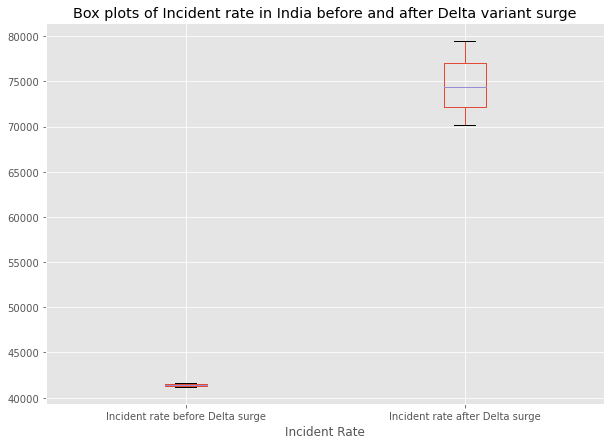

In [72]:
# Analayze the data using box plot

data_india_ir1.plot(kind='box', figsize=(10,7))
plt.title('Box plots of Incident rate in India before and after Delta variant surge')
plt.xlabel('Incident Rate')
plt.show()

## Note

If data above for incident rate is aggregated, it would be more accurate to analyze not cumulative numbers, so the difference between the days is analyzed below.

In [73]:
#Analysis of not aggregated data (difference between the days is taken)
# Initialize list of lists
data_india_ir_notaggr = [['1', d2_isum-d1_isum, d52_isum-d51_isum], ['2', d3_isum-d2_isum, d53_isum-d52_isum], ['3', d4_isum-d3_isum, d54_isum-d53_isum], ['4', d5_isum-d4_isum, d55_isum-d54_isum], ['5', d6_isum-d5_isum, d56_isum-d55_isum], ['6', d7_isum-d6_isum, d57_isum-d56_isum]]
 
# Create the pandas DataFrame
data_india_ir1_notaggr = pd.DataFrame(data_india_ir_notaggr, columns = ['Day', 'Incident rate before Delta surge', 'Incident rate after Delta surge'])
 
# print dataframe.
data_india_ir1_notaggr

,Day,Incident rate before Delta surge,Incident rate after Delta surge
0,1,52.092233,1336.474598
1,2,50.734376,1275.925931
2,3,59.843239,1644.295449
3,4,110.654369,1716.681420
4,5,57.452307,1711.550066
5,6,63.087156,1679.963179


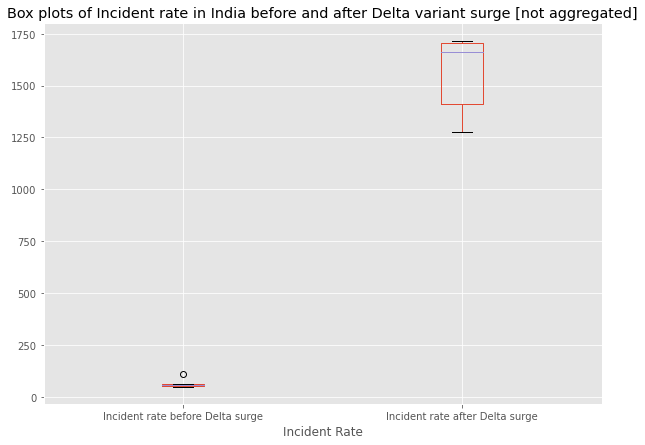

In [74]:
# Analayze the data using box plot

data_india_ir1_notaggr.plot(kind='box', figsize=(10,7))
plt.title('Box plots of Incident rate in India before and after Delta variant surge [not aggregated]')
plt.xlabel('Incident Rate')
plt.show()

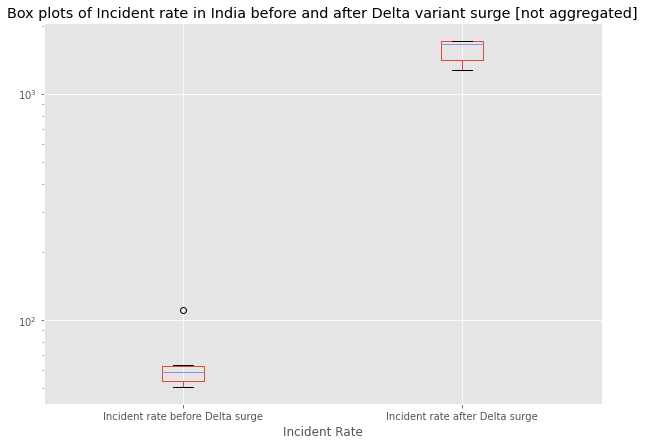

In [75]:
# To see more features of the box plot for "before the Delta surge", logarithmic scale can be used as below:
data_india_ir1_notaggr.plot(kind='box', figsize=(10,7))
plt.yscale("log")
plt.title('Box plots of Incident rate in India before and after Delta variant surge [not aggregated]')
plt.xlabel('Incident Rate')
plt.show()

In [76]:
# Ccompare the means of incicdent rates for after and before the surge:

mean_before_i=data_india_ir1_notaggr["Incident rate before Delta surge"].mean()
print(mean_before_i)
mean_after_i=data_india_ir1_notaggr["Incident rate after Delta surge"].mean()
print(mean_after_i)
factor_i=mean_after_i/mean_before_i
print(factor_i)

65.64394664451174
1560.8151072640758
23.77698458193738


## Part 2. USA case

In [77]:
#USA incident rate on each specific day before delta surge June 21-27. June 21:

data1_us = pd.read_csv('06-21-2021.csv')
#data1_us.head() (used to check the data)

data1_us.set_index("Country_Region", inplace = True)
d1_us=data1_us.loc["US","Incident_Rate"]
#print(d1_us) (used to check the data)
d1_ussum=d1_us.sum()
print(d1_ussum)

32284434.93365147


In [78]:
# Same for other days. June 22:

data2_us = pd.read_csv('06-22-2021.csv')
#data2_us.head() (used to check the data)

data2_us.set_index("Country_Region", inplace = True)
d2_us=data2_us.loc["US","Incident_Rate"]
#print(d2_us) (used to check the data)
d2_ussum=d2_us.sum()
print(d2_ussum)

32297741.354965337


In [79]:
# Same for other days. June 23:

data3_us = pd.read_csv('06-23-2021.csv')
#data3_us.head() (used to check the data)

data3_us.set_index("Country_Region", inplace = True)
d3_us=data3_us.loc["US","Incident_Rate"]
#print(d3_us) (used to check the data)
d3_ussum=d3_us.sum()
print(d3_ussum)

32312468.623821616


In [80]:
# Same for other days. June 24:

data4_us = pd.read_csv('06-24-2021.csv')
#data4_us.head() (used to check the data)

data4_us.set_index("Country_Region", inplace = True)
d4_us=data4_us.loc["US","Incident_Rate"]
#print(d4_us) (used to check the data)
d4_ussum=d4_us.sum()
print(d4_ussum)

32327810.575916387


In [81]:
# Same for other days. June 25:

data5_us = pd.read_csv('06-25-2021.csv')
#data5_us.head() (used to check the data)

data5_us.set_index("Country_Region", inplace = True)
d5_us=data5_us.loc["US","Incident_Rate"]
#print(d5_us) (used to check the data)
d5_ussum=d5_us.sum()
print(d5_ussum)

32341988.8845871


In [82]:
# Same for other days. June 26:

data6_us = pd.read_csv('06-26-2021.csv')
#data6_us.head() (used to check the data)

data6_us.set_index("Country_Region", inplace = True)
d6_us=data6_us.loc["US","Incident_Rate"]
#print(d6_us) (used to check the data)
d6_ussum=d6_us.sum()
print(d6_ussum)

32354225.793705508


In [83]:
# Same for other days. June 27:

data7_us = pd.read_csv('06-27-2021.csv')
#data7_us.head() (used to check the data)

data7_us.set_index("Country_Region", inplace = True)
d7_us=data7_us.loc["US","Incident_Rate"]
#print(d7_us) (used to check the data)
d7_ussum=d7_us.sum()
print(d7_ussum)

32357727.168001756


In [84]:
#USA incident rate on each specific day after delta surge August 21-27. August 21:

data81_us = pd.read_csv('08-21-2021.csv')
#data81_us.head() (used to check the data)

data81_us.set_index("Country_Region", inplace = True)
d81_us=data81_us.loc["US","Incident_Rate"]
#print(d81_us) (used to check the data)
d81_ussum=d81_us.sum()
print(d81_ussum)

36319844.26329509


In [85]:
# Same for other days. August 22:


data82_us = pd.read_csv('08-22-2021.csv')
#data82_us.head() (used to check the data)

data82_us.set_index("Country_Region", inplace = True)
d82_us=data82_us.loc["US","Incident_Rate"]
#print(d82_us) (used to check the data)
d82_ussum=d82_us.sum()
print(d82_ussum)

36342123.07896735


In [86]:
# Same for other days. August 23:

data83_us = pd.read_csv('08-23-2021.csv')
#data83_us.head() (used to check the data)

data83_us.set_index("Country_Region", inplace = True)
d83_us=data83_us.loc["US","Incident_Rate"]
#print(d83_us) (used to check the data)
d83_ussum=d83_us.sum()
print(d83_ussum)

36617096.65098278


In [87]:
# Same for other days. August 24:

data84_us = pd.read_csv('08-24-2021.csv')
#data84_us.head() (used to check the data)

data84_us.set_index("Country_Region", inplace = True)
d84_us=data84_us.loc["US","Incident_Rate"]
#print(d84_us) (used to check the data)
d84_ussum=d84_us.sum()
print(d84_ussum)

36791238.9657033


In [88]:
# Same for other days. August 25:

data85_us = pd.read_csv('08-25-2021.csv')
#data85_us.head() (used to check the data)

data85_us.set_index("Country_Region", inplace = True)
d85_us=data85_us.loc["US","Incident_Rate"]
#print(d85_us) (used to check the data)
d85_ussum=d85_us.sum()
print(d85_ussum)

37083943.091895625


In [89]:
# Same for other days. August 26:

data86_us = pd.read_csv('08-26-2021.csv')
#data86_us.head() (used to check the data)

data86_us.set_index("Country_Region", inplace = True)
d86_us=data86_us.loc["US","Incident_Rate"]
#print(d86_us) (used to check the data)
d86_ussum=d86_us.sum()
print(d86_ussum)

37238934.23442498


In [90]:
# Same for other days. August 27:

data87_us = pd.read_csv('08-27-2021.csv')
#data87_us.head() (used to check the data)

data87_us.set_index("Country_Region", inplace = True)
d87_us=data87_us.loc["US","Incident_Rate"]
#print(d87_us) (used to check the data)
d87_ussum=d87_us.sum()
print(d87_ussum)

37500068.55184513


In [91]:
# Initialize list of lists
data_us_ir = [['1', d1_ussum, d81_ussum], ['2', d2_ussum, d82_ussum], ['3', d3_ussum, d83_ussum], ['4', d4_ussum, d84_ussum], ['5', d5_ussum, d85_ussum], ['6', d6_ussum, d86_ussum], ['7', d7_ussum, d87_ussum]]
 
# Create the pandas DataFrame
data_us_ir1 = pd.DataFrame(data_us_ir, columns = ['Day', 'Incident rate before Delta surge', 'Incident rate after Delta surge'])
 
# print dataframe.
data_us_ir1

,Day,Incident rate before Delta surge,Incident rate after Delta surge
0,1,3.228443e+07,3.631984e+07
1,2,3.229774e+07,3.634212e+07
2,3,3.231247e+07,3.661710e+07
3,4,3.232781e+07,3.679124e+07
4,5,3.234199e+07,3.708394e+07
5,6,3.235423e+07,3.723893e+07
6,7,3.235773e+07,3.750007e+07


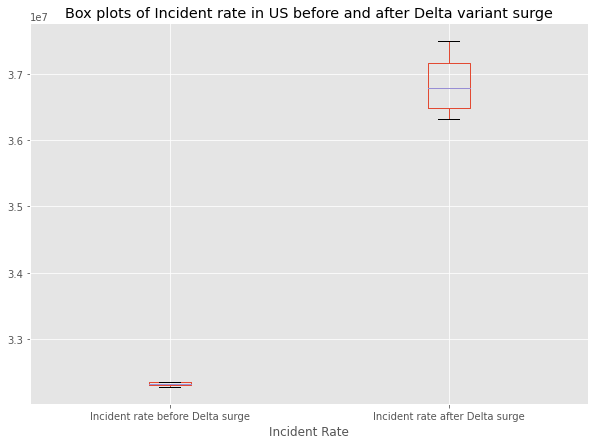

In [92]:
# Analayze the data using box plot

data_us_ir1.plot(kind='box', figsize=(10,7))
plt.title('Box plots of Incident rate in US before and after Delta variant surge')
plt.xlabel('Incident Rate')
plt.show()

## Note

Similarly here, if data above for incident rate is aggregated, it would be more accurate to analyze not cumulative numbers, so the difference between the days is analyzed below.

In [93]:
#Analysis of not aggregated data (difference between the days is taken)

# Initialize list of lists
data_us_ir_notaggr = [['1', d2_ussum-d1_ussum, d82_ussum-d81_ussum], ['2', d3_ussum-d2_ussum, d83_ussum-d82_ussum], ['3', d4_ussum-d3_ussum, d84_ussum-d83_ussum], ['4', d5_ussum-d4_ussum, d85_ussum-d84_ussum], ['5', d6_ussum-d5_ussum, d86_ussum-d85_ussum], ['6', d7_ussum-d6_ussum, d87_ussum-d86_ussum]]
 
# Create the pandas DataFrame
data_us_ir1_notaggr = pd.DataFrame(data_us_ir_notaggr, columns = ['Day', 'Incident rate before Delta surge', 'Incident rate after Delta surge'])
 
# print dataframe.
data_us_ir1_notaggr

,Day,Incident rate before Delta surge,Incident rate after Delta surge
0,1,13306.421314,22278.815672
1,2,14727.268856,274973.572015
2,3,15341.952095,174142.314721
3,4,14178.308671,292704.126192
4,5,12236.909118,154991.142529
5,6,3501.374296,261134.317420


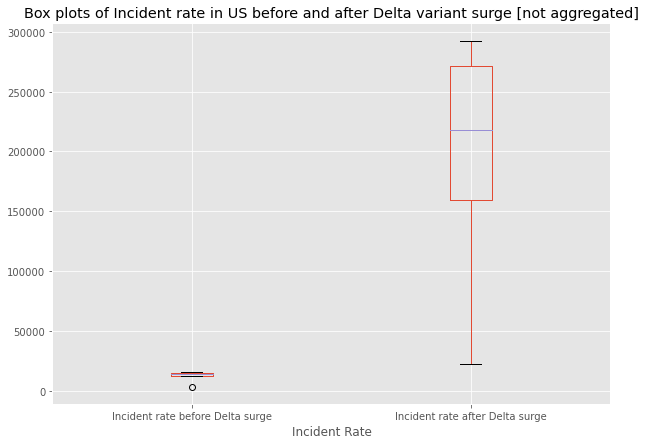

In [94]:
# Analayze the data using box plot

data_us_ir1_notaggr.plot(kind='box', figsize=(10,7))
plt.title('Box plots of Incident rate in US before and after Delta variant surge [not aggregated]')
plt.xlabel('Incident Rate')
plt.show()

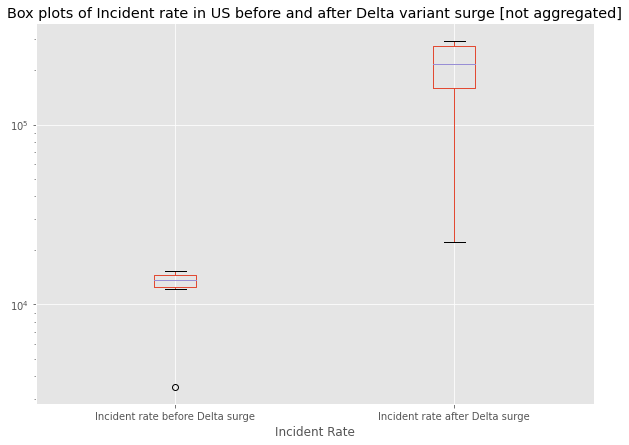

In [95]:
# To see more features of the box plot for "before the Delta surge", logarithmic scale can be used as below:

data_us_ir1_notaggr.plot(kind='box', figsize=(10,7))
plt.yscale("log")
plt.title('Box plots of Incident rate in US before and after Delta variant surge [not aggregated]')
plt.xlabel('Incident Rate')
plt.show()

In [96]:
# Ccompare the means of incident rates for after and before the surge:

mean_before_us=data_us_ir1_notaggr["Incident rate before Delta surge"].mean()
print(mean_before_us)
mean_after_us=data_us_ir1_notaggr["Incident rate after Delta surge"].mean()
print(mean_after_us)
factor_us=mean_after_us/mean_before_us
print(factor_us)

12215.372391714403
196704.0480916736
16.102992343082107


# Summary

* It can be seen that for both India and the USA the incident rate has significantly increased when Delta strain became the dominant variant. This proves that the Delta variant is more contagious than other covid variants.
* The box plots of both countries also demonstrate that for the period of "after Delta surge" the variation between the cases number is higher than in the "before Delta surge" period, meaning that a larger difference between maximum and minimum is present. This can be the result of spikes of some Delta hotspots on certain days, which is hard to predict.
* The factor of increase incident rate increase before and after delta surge (means considered) for India was around 23 and for the USA was around 16.
* Indeed, India was more affected with many severe cases of covid delta strain, many hospitalizations, and deaths. 
* This can be attributed to the higher density of population with the easier spread of the virus and probably lower number of people who had access to reasonable healthcare help, as well as other factors.

## Reference
https://www.vox.com/coronavirus-covid19/22628806/india-covid-19-cases-deaths-delta-variant

https://en.wikipedia.org/wiki/SARS-CoV-2_Delta_variant

https://www.yalemedicine.org/news/5-things-to-know-delta-variant-covid

https://www.washingtonpost.com/health/2021/07/16/covid-cases-rising/

https://www.bbc.com/news/health-57525891

https://www.bmj.com/content/373/bmj.n1596